결정 트리의 앙상블
----
- 앙상블: 여러 머신러닝 모델을 연결해서 더 강력한 모델을 만드는 기법. 
    - 랜덤 포레스트
    - 그래디언트 부스팅
    - 이거 두 개 외에도 다른 앙상블 기법이 더 있지만 이 2개가 분류와 회귀 문제에서 효과적이라고 함.

    - 보통 random forest를 먼저 함(더 안정적이어서)
    - 예측 시간이 중요하거나 성능을 아주 높여야 할 때 gradient boosting을 사용함. 

### 랜덤 포레스트
- 회귀, 분류에 있어서 가장 많이 사용되는 머신러닝 알고리즘.
    - 성능 좋음.
        - 매우 큰 데이터셋에도 잘 작동.
        - 단 차원이 높고 희소한 데이터에는 좋지 않음. 이건 선형모델 써라.
            - 텍스트 데이터와 같이.
    - 매개변수 튜닝이 많이 필요 없음.
    - 단 선형 모델에 비해 메모리를 많이 씀. 오래 걸림.
- 결정 트리 기반의 앙상블 기법
    - 조금씩 다른 여러 결정 트리의 묶음.
        - 각 트리는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 과대적합하는 경향이 있음.
        - 따라서 잘 작동하되, 서로 다른 방향으로 과대적합된 트리를 많이 만들기.
        - 그 결과를 평균내서 과대적합도니 양을 줄이는 것.
- 결정 트리의 주요 단점인 과대적합 경향을 회피하게 해준다.
    - 일단 random forest로 max_depth 매개변수가 있기는 함.
- 여러 다른 트리를 포함해야 함.
    - 트리를 랜덤하게 만들기. 2가지 방법
        - 각각의 트리를 만들 때 데이터 포인트를 무작위로 선택하거나,
        - 분할 테스트에서 특성을 무작위로 선택하거나.


#### 랜덤 포레스트 구축 과정.
1. 생성할 tree의 개수 설정. 
    - parameter는 n_estimators
    - 메모리와 시간이 허락하는 한에서 가능한 많이 만드는게 좋다.
    - n_jobs 매개변수를 사용하여 멀티프로세싱으로 만들 수있음.
        - n_jobs=-1 이면 모든 코어 사용.
2. 각각의 tree를 만들기 위한 bootstrap sample을 training data로부터 생성.
    - n_samples 개의 data points가 training data로 주어졌을 때, 이 중 n_samples 의 data points를 중복을 허용하여 random하게 선택.
3. bootstrap sample로부터 결정 트리 생성.
    - 단일 결정 트리 생성 과정과 약간 다름.
        - 각 노드에서 전체 특성을 대상으로 최선의 test를 찾지 않음.
        - 대신, 각 노드에서 후보 특성을 <U>무작위</U>로 선택한 후, 그 중 최선의 test 를 찾음.
        - 선택하는 후보 특성의 개수 선정 파라미터는 max_features.
            - max features가 핵심 매개변수
            - 이 값이 크면 랜덤 포레스트의 trees가 비슷비슷해짐.
            - 이 값이 작으면 trees가 서로 달라지고, 깊이가 깊어진다.
            - 기본값을 쓰는게 좋다.
                - 회귀의 경우 기본값: max_features=sqrt(n_features)
                - 분류의 경우 기본값: max_features=n_features
4. 랜덤 포레스트가 생성된 후, 새로운 data point에 대해 판단을 할 때
    - 각 tree에서 판단을 수행.
    - 회귀의 경우: 각 tree의 결과값의 평균
    - 분류의 경우: 트리들이 예측한 확률(결정 트리가 과대적합되지 않으면 각 결과가 확률로서 주어지겠지)을 평균내어, 가장 높은 확률을 가진 클래스로 결정 (약한 투표 전략)

    

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

In [3]:
#랜덤 포레스트를 만들려면 생성할 트리의 개수를 정해야 함.
#n_estimators 매개 변수값으로 결정

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

#만들어진 tree는 estimator_ 속성에 저장됨.





RandomForestClassifier(n_estimators=5, random_state=2)

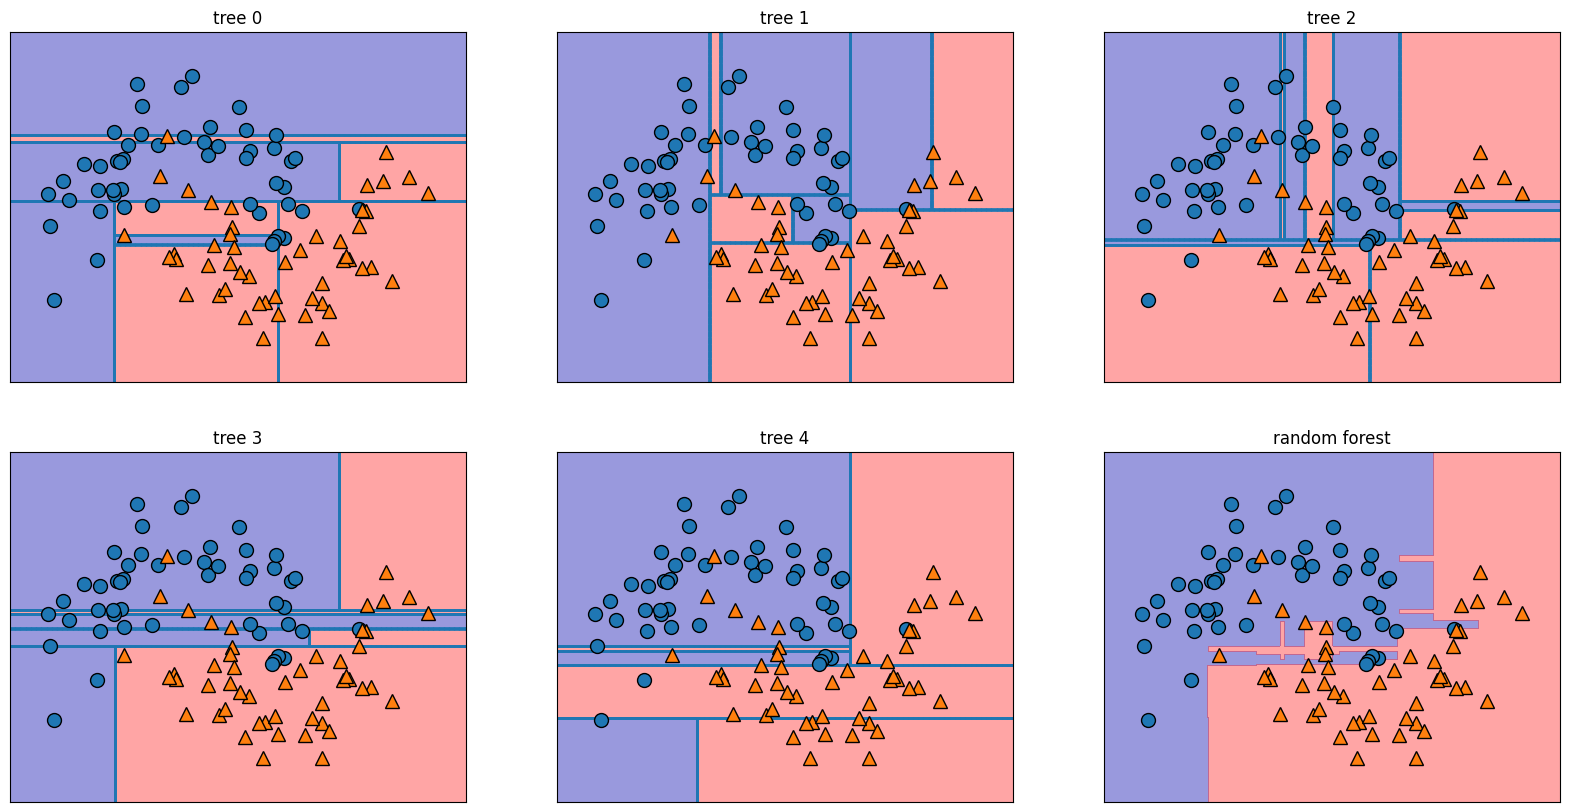

In [6]:
#시각화 과정.
import mglearn
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    #estimators_는 각각 만들어진 tree.
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X,y, tree, ax=ax)

#6번째, 통합 random forest 시각화.
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=0.4)
axes[-1,-1].set_title("random forest")
mglearn.discrete_scatter(X[:,0], X[:,1],y)


In [3]:
# 유방암 데이터셋
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,  random_state=0)

In [12]:
# 100개의 tree로 된 random forest
#랜덤 포레스트를 만들려면 생성할 트리의 개수를 정해야 함.
#n_estimators 매개 변수값으로 결정

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

#만들어진 tree는 estimator_ 속성에 저장됨.
print("training set accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(forest.score(X_test, y_test)))
#뭐지? data split 할 때, stratify 를 넣으니까 오히려 정확도가 더 떨어진다. 이상하네.

training set accuracy: 1.000
test set accuracy: 0.972


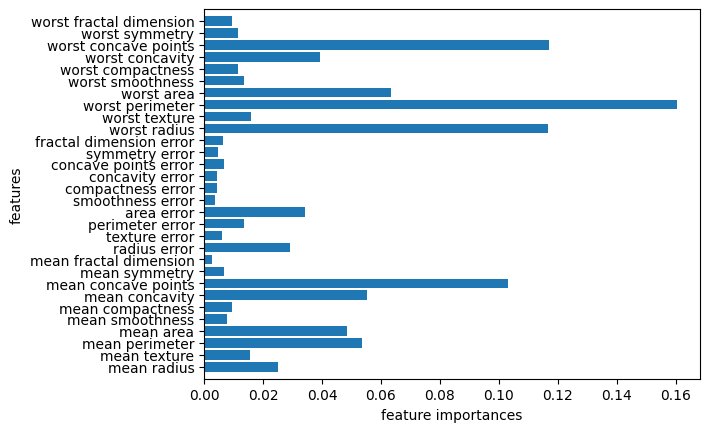

In [13]:
#특성 중요도
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[-1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)

plot_feature_importance_cancer(forest)

### 그래디언트 부스팅 회귀 트리
- 회귀, 분류 두 경우 모두에 사용 가능
    - 회귀는 scikit-learn의 GradientBoostingRegressor
    - 분류는 scikit-learn의 GradientBoostingClassifier
- 구축 개념.
    - 트리를 만든 뒤, 그 만들어진 tree와 target 값 사이의 오차를 줄이는 방향으로 tree를 추가.
        - 손실 함수(오차 정의를 위해)를 정의하고,
        - 경사 하강법(gradient descent)를 사용하여 어느 방향으로 가야 오차가 줄어들지 정보를 얻는다.
        - 추가되는 각각의 tree는 일부에 대해서만 예측을 잘 수행한다.
    - 무작위성이 존재하지 않음.
    - 보통 1개에서 5개 정도의 깊지 않은 trees를 사용.
- 이점
    - 메모리를 적게 사용.
    - 예측이 빠름.
    - 특성의 스케일을 조정하지 않아도 됨.
    - 연속적인 특성에도 잘 동작 
- 랜덤 포레스트와의 비교.
    - 매개 변수 설정에 더 민감. 훈련 시간이 오래 걸림.
    - 그러나 설정 잘 하면 정확도가 더 높은 편.
    - 이것도 희소한 고차원 데이터에는 잘 작동하지 않음. 
- 핵심 매개변수
    - learning_rate: 이전 tree의 오차를 얼마나 강하게 보정할 것인가? 
        - 클 수록 트리의 보정이 강해지고, 더 복잡한 모델이 됨.
        - 작을수록, 비슷한 정도의 복잡도 모델을 만들기 위해 더 많은 tree가 추가되어야 함.
    - n_estimators: 앙상블에 추가할 tree의 개수. 
        - random forest와 달리, 너무 크면 모델이 복잡해지고, 과대적합될 가능성이 높아진다.
        - 보통, 가용한 시간과 메모리에서 최대한 n_estimators를 높게 잡고, 그 후 적절한 learning_rate를 설정함.
    - max_depth, max_leaf_nodes: 작으면 복잡도 감소. 보통 max_depth 5 이하로 잡는다. 

대규모 머신러닝 문제에 gradient boosting 을 할 경우,

xgboost 패키지 사용을 검토할 것.

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,  random_state=0)


gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
# max depth는 정수일 것.
#어라? 앞에서 무작위성이 존재하지 않는다고 되어 있는데, 왜 random seed를 설정하는 파라미터가 있지?
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [8]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
# max depth는 정수일 것.
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.958


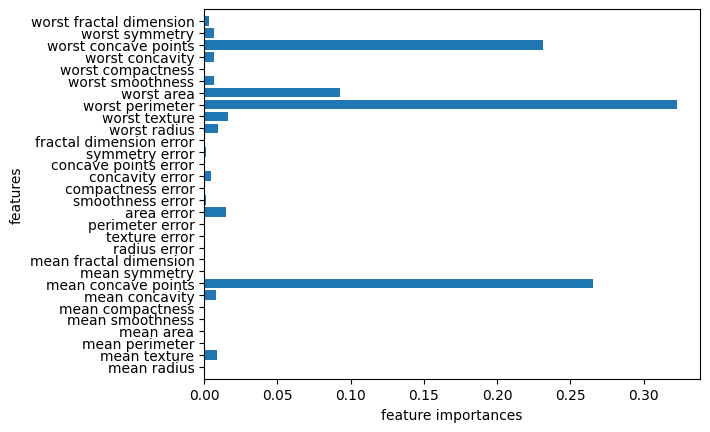

In [12]:
#특성 중요도
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[-1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)

plot_feature_importance_cancer(gbrt)

gradient boosting에서는 일부 특성들이 완전히 무시되는 것이 관찰됨.